In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from surprise import SVD
from surprise import Dataset, Reader, accuracy

In [2]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df = ratings.drop("timestamp", axis=1)
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [6]:
trainset, testset = train_test_split(df, test_size=.2)
print("Train size: ", trainset.shape)
print("Test size: ", testset.shape)

Train size:  (80668, 3)
Test size:  (20168, 3)


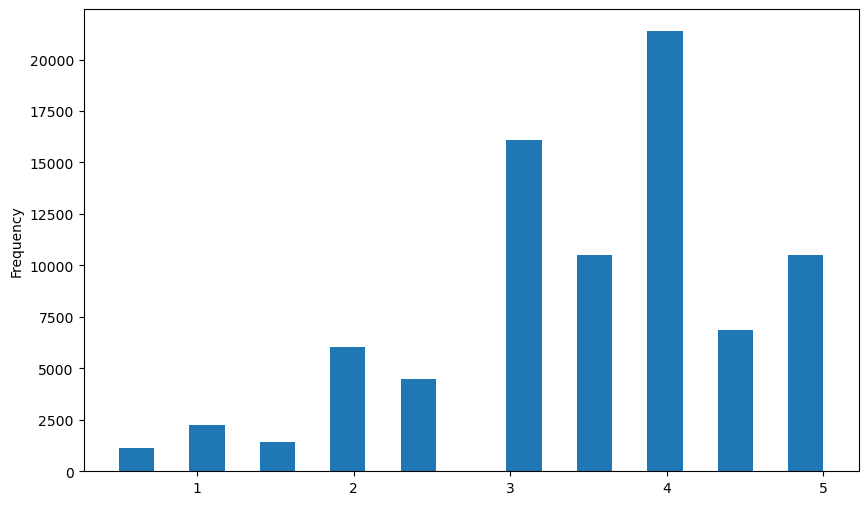

In [15]:
plt.figure(figsize = (10, 6))
trainset.rating.plot.hist(bins = 20)
plt.show()

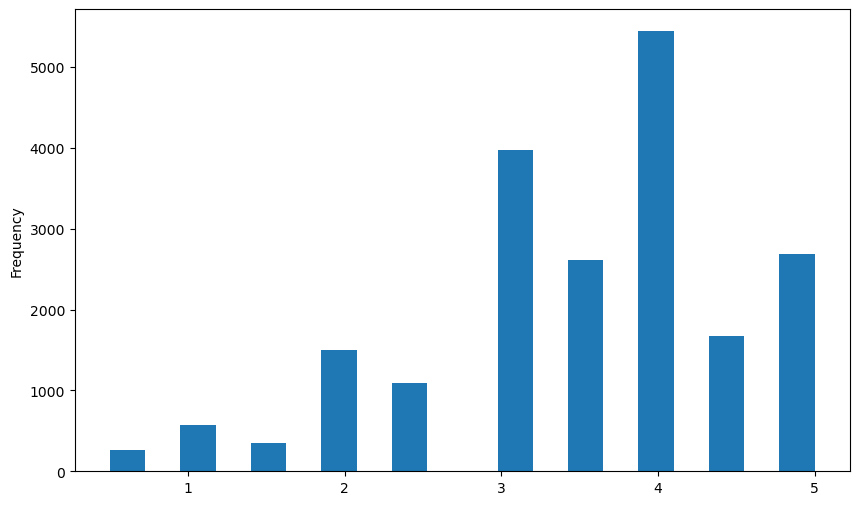

In [16]:
plt.figure(figsize = (10, 6))
testset.rating.plot.hist(bins = 20)
plt.show()

In [67]:
reader = Reader(rating_scale = (1, 5))
data_train = Dataset.load_from_df(trainset, reader)
data_test = Dataset.load_from_df(testset, reader)

In [68]:
data_train = data_train.build_full_trainset()
data_test = data_test.build_full_trainset()

In [69]:
mean = data_train.global_mean
print('Train rating', mean)

mean = data_test.global_mean
print('Test rating', mean)

Train rating 3.4996467000545444
Test rating 3.509197738992463


In [70]:
data_trainset = data_train.build_testset()
data_testset = data_test.build_testset()

In [71]:
algo = SVD(n_factors=5)

In [72]:
algo.fit(data_train)


In [73]:
train_pred = algo.test(data_trainset)
accuracy.rmse(train_pred)

RMSE: 0.8132


0.8132177593526447

In [74]:
test_pred = algo.test(data_testset)
accuracy.rmse(test_pred)

RMSE: 0.8655


0.8655428455639135